In [1]:
#import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import collections

source: http://snap.stanford.edu/data/twitch-social-networks.html

In [3]:
#Read datasets
#
#GB
infile='data/musae_ENGB_edges.csv'
GB=nx.read_edgelist(infile, delimiter=',')
#France
infile='data/musae_FR_edges.csv'
FR=nx.read_edgelist(infile, delimiter=',')
#Portugal
infile='data/musae_PTBR_edges.csv'
PT=nx.read_edgelist(infile, delimiter=',')

In [4]:
#Number of nodes/number of edges
print ('GB',GB.number_of_nodes(),GB.number_of_edges())
print ('FR',FR.number_of_nodes(),FR.number_of_edges())
print ('PT',PT.number_of_nodes(),PT.number_of_edges())

GB 7126 35324
FR 6549 112666
PT 1912 31299


In [5]:
#network density
print (nx.density(GB))
print (nx.density(FR))
print (nx.density(PT))

0.0013914550620165345
0.005254594540493715
0.017132150575067492


In [6]:
#is connected?
print(nx.is_connected(GB))
print(nx.is_connected(FR))
print(nx.is_connected(PT))

True
True
True


# Degree distribution visualization

In [7]:
# Degree list
kkGB=[GB.degree(u) for u in GB.nodes()]
maxDegreeGB=max(kkGB)
minDegreeGB=min(kkGB)
averageDegreeGB=np.mean(kkGB)
stdDegreeGB=np.std(kkGB)
print (maxDegreeGB,minDegreeGB,averageDegreeGB,stdDegreeGB)

kkFR=[FR.degree(u) for u in FR.nodes()]
maxDegreeFR=max(kkFR)
minDegreeFR=min(kkFR)
averageDegreeFR=np.mean(kkFR)
stdDegreeFR=np.std(kkFR)
print (maxDegreeFR,minDegreeFR,averageDegreeFR,stdDegreeFR)

kkPT=[PT.degree(u) for u in PT.nodes()]
maxDegreePT=max(kkPT)
minDegreePT=min(kkPT)
averageDegreePT=np.mean(kkPT)
stdDegreePT=np.std(kkPT)
print (maxDegreePT,minDegreePT,averageDegreePT,stdDegreePT)

720 1 9.914117316867808 22.18870615557688
2040 1 34.40708505115285 77.49220079193906
767 1 32.73953974895397 55.83779131287611


### Plotting the degree distribution

In [8]:
# a function for log binning for distributions
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

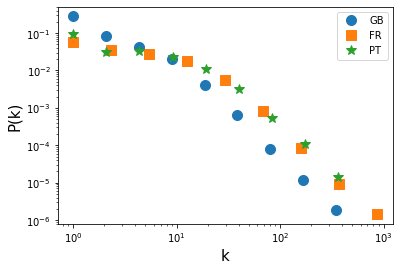

In [9]:
y,x=logBinning(np.array(kkGB),10)
plt.loglog(x,y,'o',label='GB',markersize=10)
y,x=logBinning(np.array(kkFR),10)
plt.loglog(x,y,'s',label='FR',markersize=10)
y,x=logBinning(np.array(kkPT),10)
plt.loglog(x,y,'*',label='PT',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.legend()
plt.show()

# Clustering spectrum

In [11]:
ccGB=[nx.clustering(GB,u) for u in GB.nodes()]
ccFR=[nx.clustering(FR,u) for u in FR.nodes()]
ccPT=[nx.clustering(PT,u) for u in PT.nodes()]

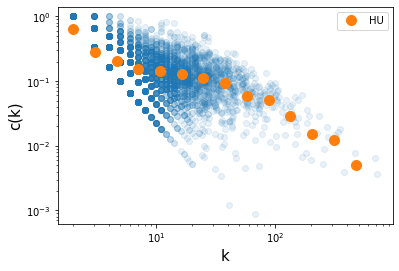

In [17]:
#For 1 country
xx=[u for (u,v) in zip(kkGB,ccGB) if v>0]
yy=[v for (u,v) in zip(kkGB,ccGB) if v>0]
plt.loglog(xx,yy,'o',alpha=0.1) # On plot tous les points
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
# On fait une somme par classes de degrés échelle logarithmique
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',label='HU',markersize=10)

plt.xlabel('k',size=15)
plt.ylabel('c(k)',size=15)
plt.legend()
plt.show()

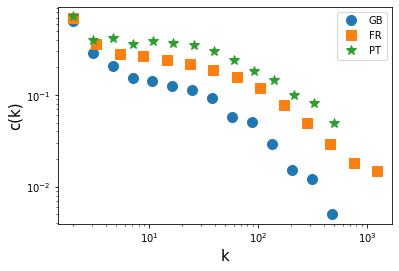

In [18]:
#For all countries
xx=[u for (u,v) in zip(kkGB,ccGB) if v>0]
yy=[v for (u,v) in zip(kkGB,ccGB) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',label='GB',markersize=10)

xx=[u for (u,v) in zip(kkFR,ccFR) if v>0]
yy=[v for (u,v) in zip(kkFR,ccFR) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'s',label='FR',markersize=10)

xx=[u for (u,v) in zip(kkPT,ccPT) if v>0]
yy=[v for (u,v) in zip(kkPT,ccPT) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'*',label='PT',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('c(k)',size=15)
plt.legend()
plt.show()

# Degree mixing

On prend le 3ème noeud

In [19]:
ego=list(GB.nodes())[2]

In [20]:
ego

'980'

In [21]:
neighEgo=list(GB.neighbors(ego))

In [22]:
neighEgo

['6194',
 '745',
 '3377',
 '4202',
 '4342',
 '2919',
 '3757',
 '4543',
 '5367',
 '3551',
 '4681',
 '3598',
 '4178',
 '2954',
 '2507',
 '4808',
 '7084',
 '3279']

In [25]:
degreeNeighEgo=[GB.degree(v) for v in neighEgo]

In [26]:
degreeNeighEgo

[6, 24, 22, 30, 11, 26, 11, 7, 17, 24, 41, 5, 3, 13, 22, 14, 8, 7]

In [27]:
np.mean(degreeNeighEgo)

16.166666666666668

In [28]:
knnGB=[ np.mean([GB.degree(v) for v in GB.neighbors(u)])  for u in GB.nodes()]
knnFR=[np.mean([FR.degree(v) for v in FR.neighbors(u)]) for u in FR.nodes()]
knnPT=[np.mean([PT.degree(v) for v in PT.neighbors(u)]) for u in PT.nodes()]

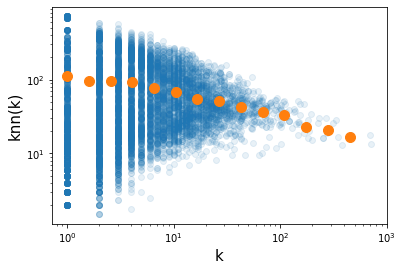

In [29]:
#For 1 country
xx=[u for (u,v) in zip(kkGB,knnGB) if v>0]
yy=[v for (u,v) in zip(kkGB,knnGB) if v>0]
plt.loglog(xx,yy,'o',alpha=0.1)
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
#if I use np.linspace I will have linear bins
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',label='HU',markersize=10)

plt.xlabel('k',size=15)
plt.ylabel('knn(k)',size=15)
plt.show()

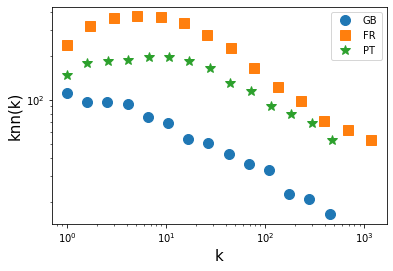

In [30]:
#For all countries
xx=[u for (u,v) in zip(kkGB,knnGB) if v>0]
yy=[v for (u,v) in zip(kkGB,knnGB) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',label='GB',markersize=10)

xx=[u for (u,v) in zip(kkFR,knnFR) if v>0]
yy=[v for (u,v) in zip(kkFR,knnFR) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'s',label='FR',markersize=10)

xx=[u for (u,v) in zip(kkPT,knnPT) if v>0]
yy=[v for (u,v) in zip(kkPT,knnPT) if v>0]
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=15)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'*',label='PT',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('knn(k)',size=15)
plt.legend()
plt.show()